**About this notebook**

This notebook trains the YapNet convolutional neural network model.  The codes were largely based on Chapter 5 of this book:

https://www.manning.com/books/deep-learning-with-python

# Data Augmentation

### - Data augmentation generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

### - Displaying some randomly augmented training images

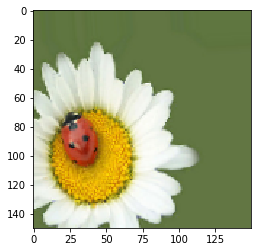

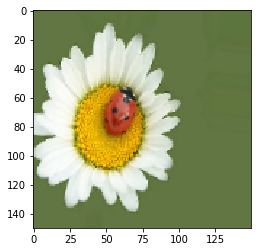

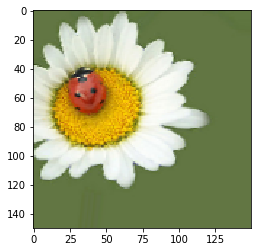

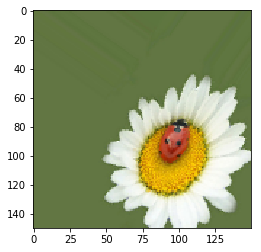

In [16]:
#module with image preprocessing utilities
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_daisy_dir, fname) for
     fname in os.listdir(train_daisy_dir)]

#choose one image to augment
img_path = fnames[3]

#read and resize image
img = image.load_img(img_path, target_size=(150, 150))

#convert to numpy array of shape (150,150,3)
x = image.img_to_array(img)

#reshape to (1,150,150,3)
x = x.reshape((1,) + x.shape)

#generates batches of randomly transformed images
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# ConvNet with Dropout

In [17]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       295168    
__________

### - Optimizer

In [19]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(lr=1e-3),
            metrics=['acc'])

### - Data augmentation generators

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,  
        class_mode='categorical') 

Found 2567 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 5)


### - Run model

In [22]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=81,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=23)

Epoch 1/100
81/81 [==============================] - 23s 283ms/step - loss: 1.4092 - acc: 0.3700 - val_loss: 1.1650 - val_acc: 0.5116
Epoch 2/100
81/81 [==============================] - 21s 260ms/step - loss: 1.1885 - acc: 0.5030 - val_loss: 1.1666 - val_acc: 0.5335
Epoch 3/100
81/81 [==============================] - 21s 260ms/step - loss: 1.0830 - acc: 0.5474 - val_loss: 0.9443 - val_acc: 0.6211
Epoch 4/100
81/81 [==============================] - 21s 256ms/step - loss: 0.9929 - acc: 0.6128 - val_loss: 0.8989 - val_acc: 0.6512
Epoch 5/100
81/81 [==============================] - 21s 256ms/step - loss: 0.9252 - acc: 0.6311 - val_loss: 0.8854 - val_acc: 0.6457
Epoch 6/100
81/81 [==============================] - 21s 258ms/step - loss: 0.8546 - acc: 0.6664 - val_loss: 0.8002 - val_acc: 0.6963
Epoch 7/100
81/81 [==============================] - 21s 262ms/step - loss: 0.8418 - acc: 0.6801 - val_loss: 0.9852 - val_acc: 0.6539
Epoch 8/100
81/81 [==============================] - 22s 269ms

Epoch 62/100
81/81 [==============================] - 21s 256ms/step - loss: 0.3419 - acc: 0.8626 - val_loss: 0.5982 - val_acc: 0.8126
Epoch 63/100
81/81 [==============================] - 21s 257ms/step - loss: 0.3480 - acc: 0.8605 - val_loss: 0.5664 - val_acc: 0.8263
Epoch 64/100
81/81 [==============================] - 21s 254ms/step - loss: 0.3637 - acc: 0.8684 - val_loss: 0.6779 - val_acc: 0.7934
Epoch 65/100
81/81 [==============================] - 21s 254ms/step - loss: 0.3216 - acc: 0.8763 - val_loss: 0.5611 - val_acc: 0.8249
Epoch 66/100
81/81 [==============================] - 21s 257ms/step - loss: 0.3356 - acc: 0.8721 - val_loss: 0.5559 - val_acc: 0.8112
Epoch 67/100
81/81 [==============================] - 21s 256ms/step - loss: 0.3205 - acc: 0.8709 - val_loss: 0.5970 - val_acc: 0.8317
Epoch 68/100
81/81 [==============================] - 21s 257ms/step - loss: 0.3306 - acc: 0.8767 - val_loss: 0.5895 - val_acc: 0.8181
Epoch 69/100
81/81 [==============================] - 2

### - Save model

In [23]:
model.save('flowers_yapnet.h5')

### - Loss and accuracy during training

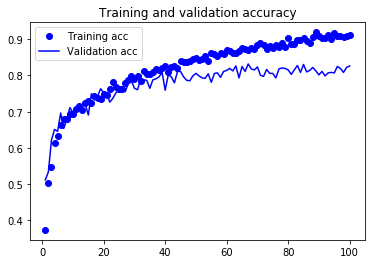

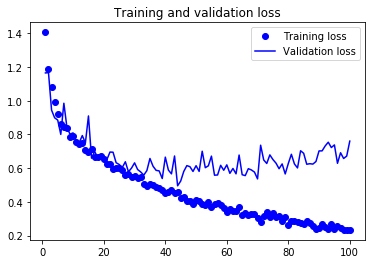

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.savefig('yapnet.png')